In [1]:
#Task 01
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {
    'StudyHours': [2, 5, 7, 1, 4, 6, 8, 3, 9, 10],
    'SleepHours': [8, 6, 5, 9, 7, 6, 4, 8, 5, 4],
    'Attendance': ['High','High','High','Low','High','Low','High','Low','High','Low'],
    'InternetUsage': ['High','Low','Low','High','Low','High','Low','High','Low','High'],
    'Pass': ['No','Yes','Yes','No','Yes','No','Yes','No','Yes','Yes']
}
df=pd.DataFrame(data)
encoders={}
for c in ['Attendance','InternetUsage','Pass']:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])
    encoders[c]=le
X=df[['StudyHours','SleepHours','Attendance','InternetUsage']]
y=df['Pass']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=42,stratify=y)
model=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
score=accuracy_score(y_test,y_predict)
print(f'Accuracy Score: {round(score*100,2)} %')
print(f'Classification Report: \n{classification_report(y_test,y_predict,target_names=encoders['Pass'].classes_)}')
print(f'Confusion Matrix : \n{confusion_matrix(y_test,y_predict)}')
model.fit(X,y)
sample_data_df=pd.DataFrame({
    'StudyHours': [6],
    'SleepHours': [10],
    'Attendance': [encoders['Attendance'].transform(['High'])[0]],
    'InternetUsage': [encoders['InternetUsage'].transform(['Low'])[0]]
})
prediction=model.predict(sample_data_df)
print(f'Prediction for new student: {encoders['Pass'].inverse_transform(prediction)[0]}')
importance=model.feature_importances_
features_df=pd.DataFrame({
    'Feature':X.columns,
    'Importance': importance
}).sort_values(by='Importance',ascending=False)
print(features_df)

Accuracy Score: 60.0 %
Classification Report: 
              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Confusion Matrix : 
[[1 1]
 [1 2]]
Prediction for new student: Yes
         Feature  Importance
1     SleepHours    0.341514
0     StudyHours    0.304701
3  InternetUsage    0.203408
2     Attendance    0.150377


Accuracy of model: 100.0 %
Classification Report: 
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix: 
[[2 0]
 [0 3]]
Prediction to Plant : No
  Feature  Importance
3   Pests         1.0
0    Soil         0.0
1    Rain         0.0
2    Temp         0.0


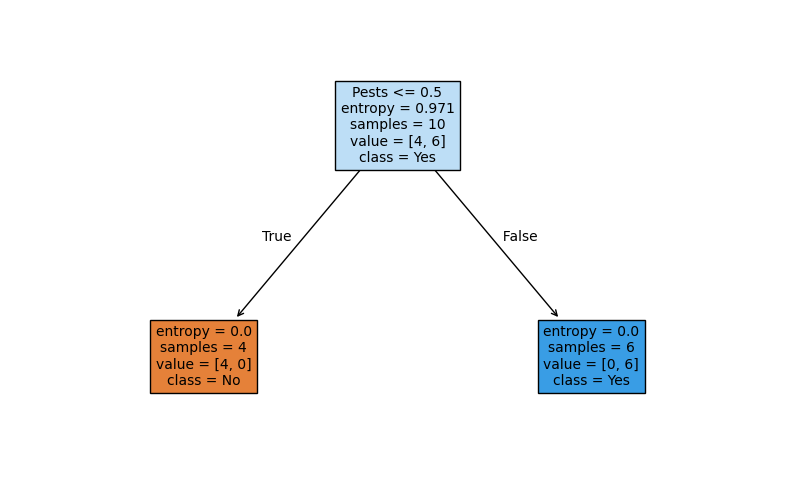

In [2]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Soil': ['Fertile', 'Rocky', 'Fertile', 'Sandy', 'Sandy', 'Rocky', 'Fertile', 'Sandy', 'Rocky', 'Fertile'],
    'Rain': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium'],
    'Temp': ['Warm', 'Hot', 'Cool', 'Cool', 'Warm', 'Hot', 'Warm', 'Cool', 'Hot', 'Warm'],
    'Pests': ['Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low'],
    'Plant': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
}
df=pd.DataFrame(data)
encoders={}
for c in df.columns:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])
    encoders[c]=le
X=df[['Soil','Rain','Temp','Pests']]
y=df['Plant']
model=DecisionTreeClassifier(criterion='entropy')
#Train the data and testing its accuracy
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=42,stratify=y)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
scores=accuracy_score(y_test,y_predict)
print(f'Accuracy of model: {round(scores*100,2)} %')
print(f'Classification Report: \n{classification_report(y_test,y_predict,target_names=encoders['Plant'].classes_)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test,y_predict)}')
#Training on whole data
model.fit(X,y)
sample_data_df=pd.DataFrame({
    'Soil':[encoders['Soil'].transform(['Sandy'])[0]],
    'Rain':[encoders['Rain'].transform(['Medium'])[0]],
    'Temp':[encoders['Temp'].transform(['Cool'])[0]],
    'Pests':[encoders['Pests'].transform(['High'])[0]]
})
prediction=model.predict(sample_data_df)
print(f"Prediction to Plant : {encoders['Plant'].inverse_transform(prediction)[0]}")

importance=model.feature_importances_
feature_importance=pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance',ascending=False)
print(feature_importance)
plt.figure(figsize=(10,6))
plot_tree(model,feature_names=['Soil','Rain','Temp','Pests'],class_names=['No','Yes'],filled=True,fontsize=10)
plt.show()
